In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### 중고여부 transaciton에 추가

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
product = pd.read_csv('/content/drive/MyDrive/TP2/prodcut_used.csv')
transaction = pd.read_csv('/content/drive/MyDrive/TP2/transaction_used.csv')

In [ ]:
# transaction에 product 중고여부 입력
for i in range(len(transaction)):
    pro_id = transaction['product_id'][i]
    if pro_id in product['id'].values:
        used_value = product.loc[product['id'] == pro_id, 'used'].values[0]
        transaction.loc[transaction['product_id'] == pro_id, 'used'] = used_value

In [ ]:
transaction.to_csv('transaction_used.csv')

In [ ]:
transaction_no_product = transaction[(transaction['used'] !=0.0) & (transaction['used'] != 1.0)]

In [ ]:
# 구매한 것들중 상품 id가 존재하는데 product에는 존재하지 않는 상품 존재
product[product['id']=="44065"]

,Unnamed: 0,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,used,sales_count


In [ ]:
transaction_used_df = transaction[(transaction['used']== 0.0) | (transaction['used'] == 1.0)]

In [ ]:
transaction_used_df['used'] = transaction_used_df['used'].astype(int)

<ipython-input-18-253df557f496>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_used_df['used'] = transaction_used_df['used'].astype(int)


In [ ]:
transaction_used_df = transaction_used_df.reset_index(drop=True)

In [ ]:
transaction_used_df = transaction_used_df.drop(columns='index',axis=1)

In [ ]:
transaction_used_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253966 entries, 0 to 1253965
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   created_at              1253966 non-null  object 
 1   customer_id             1253966 non-null  int64  
 2   booking_id              1253966 non-null  object 
 3   session_id              1253966 non-null  object 
 4   payment_method          1253966 non-null  object 
 5   payment_status          1253966 non-null  object 
 6   promo_amount            1253966 non-null  int64  
 7   promo_code              480908 non-null   object 
 8   shipment_fee            1253966 non-null  int64  
 9   shipment_date_limit     1253966 non-null  object 
 10  shipment_location_lat   1253966 non-null  float64
 11  shipment_location_long  1253966 non-null  float64
 12  total_amount            1253966 non-null  int64  
 13  product_id              1253966 non-null  int64  
 14  qu

In [ ]:
transaction_used_df[transaction_used_df['created_at'].str[:4] == '2018'].groupby('used')['session_id'].count()

used
0    65671
1    42075
Name: session_id, dtype: int64

In [ ]:
transaction_used_df[transaction_used_df['created_at'].str[:4] == '2019'].groupby('used')['session_id'].count()

used
0    104786
1     66612
Name: session_id, dtype: int64

In [ ]:
transaction_used_df[transaction_used_df['created_at'].str[:4] == '2020'].groupby('used')['session_id'].count()

used
0    154047
1    100796
Name: session_id, dtype: int64

In [ ]:
transaction_used_df[transaction_used_df['created_at'].str[:4] == '2021'].groupby('used')['session_id'].count()

used
0    224586
1    152641
Name: session_id, dtype: int64

In [ ]:
transaction_used_df[transaction_used_df['created_at'].str[:4] == '2022'].groupby('used')['session_id'].count()

used
0    170364
1    115205
Name: session_id, dtype: int64

In [ ]:
# 중고상품 구매 증가했는지 여부 파악
years = ['2018', '2019', '2020', '2021', '2022']
data = []

for year in years:
    filtered_df = transaction_used_df[transaction_used_df['created_at'].str[:4] == year]
    count_0 = filtered_df[filtered_df['used'] == 0]['session_id'].count()
    count_1 = filtered_df[filtered_df['used'] == 1]['session_id'].count()
    data.append({'연도': year, 0: count_0, 1: count_1})

df = pd.DataFrame(data)


In [ ]:
df

,연도,0,1
0,2018,65671,42075
1,2019,104786,66612
2,2020,154047,100796
3,2021,224586,152641
4,2022,170364,115205


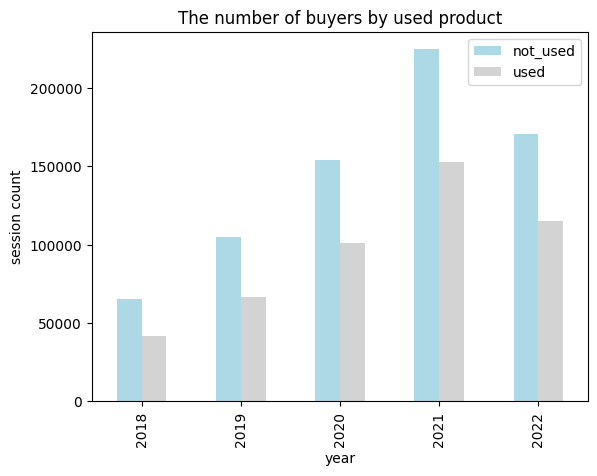

In [ ]:
# 중고여부별 구매자수

labels = ['Not Used', 'Used']
colors = ['#ADD8E6', '#D3D3D3']

df.plot(kind='bar', color=colors)

plt.title('The number of buyers by used product')
plt.xlabel('year')
plt.ylabel('session count')
plt.legend(['not_used','used'])
plt.xticks(range(len(df)), df['연도'])
plt.show()

In [ ]:
# 중고여부별 구매자수
years = ['2018', '2019', '2020', '2021', '2022']
data = []

for year in years:
    filtered_df = transaction[transaction['created_at'].str[:4] == year]
    count_0 = filtered_df[filtered_df['used'] == 0]['session_id'].count()
    count_1 = filtered_df[filtered_df['used'] == 1]['session_id'].count()
    data.append({'연도': year, 0: count_0, 1: count_1})

df_rate = pd.DataFrame(data)


In [ ]:
df_rate

,연도,0,1
0,2018,65671,42075
1,2019,104786,66612
2,2020,154047,100796
3,2021,224586,152641
4,2022,170364,115205


In [ ]:
# 연도별 전체 구매자 수
df_rate['sum'] = 0
for i in range(len(df_rate)):
  df_rate['sum'][i] = df_rate[0][i] + df_rate[1][i]

<ipython-input-6-029695389109>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rate['sum'][i] = df_rate[0][i] + df_rate[1][i]


In [ ]:
# 연도별 고객 비율
df_rate['0_rate'] = df_rate[0] / df_rate['sum'] * 100
df_rate['1_rate'] = df_rate[1] / df_rate['sum'] * 100

In [ ]:
# 소수점 반올림
df_rate['0_rate']= round(df_rate['0_rate'], 2)
df_rate['1_rate']= round(df_rate['1_rate'], 2)

In [ ]:
transaction[transaction['created_at'].str[:4] == '2020'].count()

Unnamed: 0                254983
created_at                254983
customer_id               254983
booking_id                254983
session_id                254983
payment_method            254983
payment_status            254983
promo_amount              254983
promo_code                104112
shipment_fee              254983
shipment_date_limit       254983
shipment_location_lat     254983
shipment_location_long    254983
total_amount              254983
product_id                254983
quantity                  254983
item_price                254983
used                      254843
dtype: int64

In [ ]:
df_rate

,연도,0,1,sum,0_rate,1_rate
0,2018,65671,42075,107746,60.95,39.05
1,2019,104786,66612,171398,61.14,38.86
2,2020,154047,100796,254843,60.45,39.55
3,2021,224586,152641,377227,59.54,40.46
4,2022,170364,115205,285569,59.66,40.34


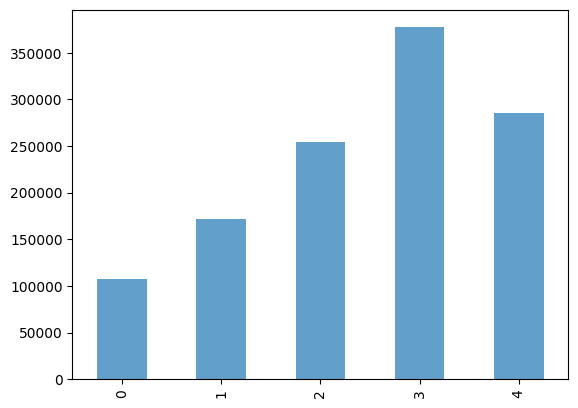

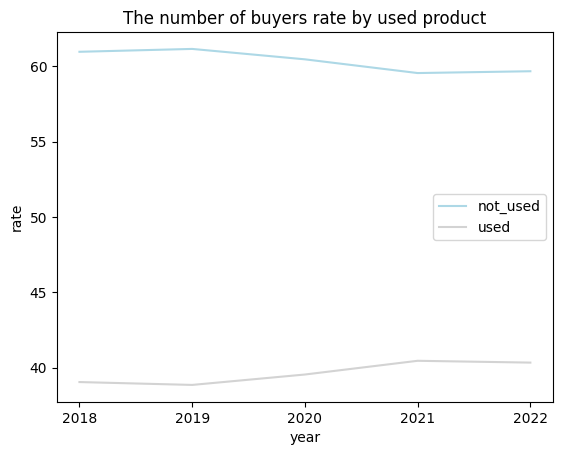

In [ ]:
# 중고여부별 구매자수

labels = ['Not Used', 'Used']
colors = ['#ADD8E6', '#D3D3D3']

df_rate['sum'].plot(kind='bar',alpha=0.7)
df_rate[['0_rate', '1_rate']].plot(kind='line',color=colors)

plt.title('The number of buyers rate by used product')
plt.xlabel('year')
plt.ylabel('rate')
plt.legend(['not_used','used'])
plt.xticks(range(len(df_rate)), df_rate['연도'])
plt.show()

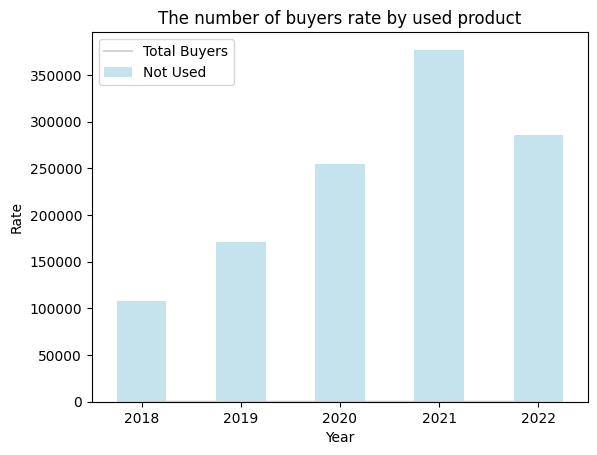

In [ ]:
import matplotlib.pyplot as plt

labels = ['Not Used', 'Used']
colors = ['#ADD8E6', '#D3D3D3']

# ax = df_rate['sum'].plot(kind='bar', alpha=0.7, color=colors[0])
# df_rate['1_rate'].plot(kind='line', ax=ax, color=colors[1:])
df_rate['sum'].plot(kind='bar', alpha=0.7, color=colors[0])
df_rate['1_rate'].plot(kind='line', color=colors[1:])

plt.title('The number of buyers rate by used product')
plt.xlabel('Year')
plt.ylabel('Rate')
plt.legend(['Total Buyers', 'Not Used', 'Used'])
plt.xticks(range(len(df_rate)), df_rate['연도'])
plt.show()


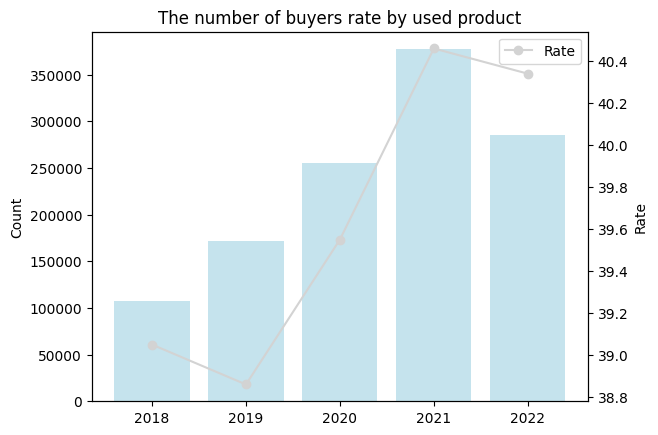

In [ ]:
import matplotlib.pyplot as plt

labels = ['Not Used', 'Used']
colors = ['#ADD8E6', '#D3D3D3']

fig, ax1 = plt.subplots()

ax1.bar(range(len(df_rate)), df_rate['sum'], alpha=0.7, color=colors[0])
ax1.set_ylabel('Count')

ax2 = ax1.twinx()
ax2.plot(df_rate['1_rate'], color=colors[1], marker='o')
ax2.set_ylabel('Rate')

plt.title('The number of buyers rate by used product')
plt.xlabel('Year')
plt.legend(['Rate'])
plt.xticks(range(len(df_rate)), df_rate['연도'])

plt.show()

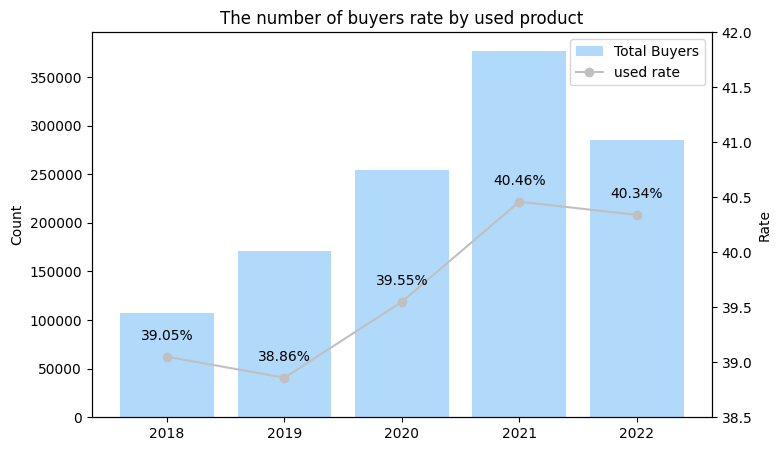

In [ ]:
import matplotlib.pyplot as plt

labels = ['Not Used', 'Used']
colors = ['#90CAF9', 'silver']

fig, ax1 = plt.subplots(figsize=(8,5))

ax1.bar(range(len(df_rate)), df_rate['sum'], alpha=0.7, color=colors[0], label='Total Buyers')
ax1.set_ylabel('Count')

ax2 = ax1.twinx()
ax2.plot(df_rate['1_rate'], color=colors[1], marker='o', label='used rate')
ax2.set_ylabel('Rate')

for i, rate in enumerate(df_rate['1_rate']):
    ax2.annotate(f'{rate:.2f}%', (i, rate), xytext=(0, 10), textcoords='offset points',
                 ha='center', va='bottom')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2)

plt.title('The number of buyers rate by used product')
plt.xlabel('Year')
plt.xticks(range(len(df_rate)), df_rate['연도'])
yticks = np.arange(38.5, 42.5, 0.5)
plt.yticks(yticks)

plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
 filtered_sessions_light = pd.read_csv('/content/drive/MyDrive/TP2/filtered_sessions_light.csv')

In [ ]:
filtered_sessions_light.head(5)

,Unnamed: 0,session_id,event_name,event_time,search_keywords
0,66,00007415-e0e7-4a33-95e8-5bc749016876_1,HOMEPAGE,2022-07-24 13:12:21.038087+00:00,NaN
1,67,00007415-e0e7-4a33-95e8-5bc749016876_1,ADD_TO_CART,2022-07-24 13:12:25.038087+00:00,NaN
2,68,00007415-e0e7-4a33-95e8-5bc749016876_1,SCROLL,2022-07-24 13:12:26.038087+00:00,NaN
3,69,00007415-e0e7-4a33-95e8-5bc749016876_1,SCROLL,2022-07-24 13:12:28.038087+00:00,NaN
4,70,00007415-e0e7-4a33-95e8-5bc749016876_1,CLICK,2022-07-24 13:12:35.038087+00:00,NaN


In [ ]:
# 검색 키워드가 중고였던 경우의 다음 인덱스
session_ids = filtered_sessions_light['session_id'].unique()
next_rows_idx = []

for session_id in session_ids:
    session_data = filtered_sessions_light[filtered_sessions_light['session_id'] == session_id]
    keyword_index = session_data[session_data['search_keywords'] == '중고'].index

    if len(keyword_index) > 0:
        next_row_index = keyword_index[0] + 1
        next_rows_idx.append(next_row_index)

In [ ]:
next_rows_idx[:3]

[53, 55, 56]

In [ ]:
filtered_sessions_light[filtered_sessions_light.index == 52]

,Unnamed: 0,session_id,event_name,event_time,search_keywords
52,118,00007415-e0e7-4a33-95e8-5bc749016876_1,SEARCH,2022-07-24 13:16:37.038087+00:00,중고


In [ ]:
filtered_sessions_light[filtered_sessions_light.index == 53]

,Unnamed: 0,session_id,event_name,event_time,search_keywords
53,119,00007415-e0e7-4a33-95e8-5bc749016876_1,BOOKING,2022-07-24 13:16:40.038087+00:00,NaN


In [ ]:
# 검색 키워드가 중고였던 경우의 다음 인덱스를 통해 행 추출
next_rows = []

for i in range(len(next_rows_idx)):
  index = next_rows_idx[i]
  next_row = filtered_sessions_light[filtered_sessions_light.index == index]
  next_rows.append(next_row)

next_rows_df_light = pd.concat(next_rows)

In [ ]:
next_rows_df_light

,Unnamed: 0,session_id,event_name,event_time,search_keywords
53,119,00007415-e0e7-4a33-95e8-5bc749016876_1,BOOKING,2022-07-24 13:16:40.038087+00:00,NaN
55,329,00016815-cf29-45fa-8974-17c6796aab29_155,SEARCH,2021-04-30 00:31:35.180746+00:00,중고
56,432,00020c37-ec61-4e2a-b03d-bcaaad934c4c_243,SEARCH,2020-09-20 23:43:17.095453+00:00,중고
57,434,00020c37-ec61-4e2a-b03d-bcaaad934c4c_245,SEARCH,2020-09-21 02:08:02.095453+00:00,중고
58,452,000288dc-e7cf-44b9-9f2d-270015fd83c6_257,HOMEPAGE,2021-11-20 00:19:45.288196+00:00,NaN
...,...,...,...,...,...
759982,7994860,fffc24d3-6e47-4df3-9d6c-3b89c63fb5fc_5353640,SEARCH,2021-06-25 16:40:46.818614+00:00,중고
759983,7994975,fffd5e21-ff89-4c97-8fe5-5d59520d0699_5353733,SEARCH,2021-12-31 00:43:07.541124+00:00,중고
759984,7995034,fffe0edc-392a-49c1-911c-451c14cb0298_5353781,SEARCH,2022-04-21 23:02:32.711463+00:00,중고
759985,7995035,fffe0edc-392a-49c1-911c-451c14cb0298_5353781,ADD_PROMO,2022-04-21 23:02:44.711463+00:00,NaN


In [ ]:
next_rows_df_light.to_csv('next_rows_df_light.csv')

In [ ]:
# 이벤트별 개수
next_rows_df_light.groupby('event_name').count()

,Unnamed: 0,session_id,event_time,search_keywords
event_name,,,,
ADD_PROMO,3410,3410,3410,0
ADD_TO_CART,14711,14711,14711,0
BOOKING,1273,1273,1273,0
CLICK,5210,5210,5210,0
HOMEPAGE,18062,18062,18062,0
ITEM_DETAIL,2545,2545,2545,0
PROMO_PAGE,1179,1179,1179,0
SCROLL,3522,3522,3522,0
SEARCH,85714,85714,85714,85714


In [ ]:
# 이벤트 총 개수
len(next_rows_df_light)

135626

In [ ]:
# ADD_TO_CART한 경우의 비율
14711/135626*100

10.846740300532346

In [ ]:
# SEARCH한 경우의 비율
85714/135626*100

63.198796690899975

In [ ]:
# 재검색 한 경우 검색 키워드
next_rows_df_light['search_keywords'].unique()

array([nan, '중고', '파티 드레스', '여성 가방', '옷', '나이키 신발', '긴 바지', '셔츠', '샌들',
       '티셔츠', '직장용 가방', '아디다스 신발', '신발', '모자', '바지', '시계', '원피스', '잠옷'],
      dtype=object)

In [ ]:
next_rows_df_light.groupby('search_keywords').describe()

Unnamed: 0                                                     \
                     count          mean           std        min         25%   
search_keywords                                                                 
긴 바지                  58.0  4.174481e+06  2.383170e+06    37723.0  2403928.25   
나이키 신발               115.0  3.623291e+06  2.444449e+06    37443.0  1359342.50   
모자                     2.0  2.153103e+06  2.498937e+06   386088.0  1269595.50   
바지                    11.0  4.803792e+06  2.511200e+06   489507.0  2843514.50   
샌들                    27.0  3.845485e+06  2.255829e+06    41212.0  1959834.50   
셔츠                   173.0  3.891169e+06  2.322292e+06    41186.0  1901652.00   
시계                     4.0  2.200042e+06  1.454444e+06  1070035.0  1211946.25   
신발                    63.0  4.378421e+06  2.101832e+06   304997.0  3041745.00   
아디다스 신발               53.0  3.911202e+06  2.154902e+06   273598.0  2201398.00   
여성 가방                288.0  4.035721e+06  2.349461e+06    19756.0  2002860.50   
옷                    179.0  3.942509e+06  2.436691e+06    31158.0  1767812.50   
원피스                    2.0  4.126762e+06  3.334247e+06  1769093.0  2947927.50   
잠옷                     1.0  6.475901e+06           NaN  6475901.0  6475901.00   
중고                 83745.0  4.001864e+06  2.305654e+06      329.0  2005032.00   
직장용 가방                83.0  4.305727e+06  2.333729e+06   207101.0  2243989.50   
티셔츠                  190.0  4.125184e+06  2.298497e+06   147049.0  2231510.50   
파티 드레스               720.0  4.141406e+06  2.257536e+06     2949.0  2117651.50   

                                                   
                       50%         75%        max  
search_keywords                                    
긴 바지             4369866.5  6016639.50  7960268.0  
나이키 신발           3547821.0  5642379.50  7979834.0  
모자               2153103.0  3036610.50  3920118.0  
바지               5632064.0  6852793.50  7506374.0  
샌들               3845480.0  5577632.00  7831702.0  
셔츠               3730842.0  5976151.00  7978901.0  
시계               1742356.0  2730451.25  4245419.0  
신발               4315320.0  5964798.50  7927073.0  
아디다스 신발          3552137.0  5675277.00  7696020.0  
여성 가방            4058800.5  6060645.50  7910327.0  
옷                3894732.0  6031064.00  7987767.0  
원피스              4126762.0  5305596.50  6484431.0  
잠옷               6475901.0  6475901.00  6475901.0  
중고               4000450.0  6002747.00  7995210.0  
직장용 가방           4542742.0  6574465.50  7973955.0  
티셔츠              3859469.5  6098209.75  7953015.0  
파티 드레스           4316543.5  5998984.75  7970428.0

In [ ]:
# 검색인 경우의 개수
len(next_rows_df_light[next_rows_df_light['event_name']=='SEARCH'])

85714

In [ ]:
# 중고를 재검색한 경우의 비율
83745/85714*100

97.7028256760856

In [ ]:
next_rows_df_light = pd.read_csv('/content/next_rows_df_light.csv')

In [ ]:
# session_id로 개수
next_rows_df_light.groupby('event_name')['session_id'].count()

event_name
ADD_PROMO       3410
ADD_TO_CART    14711
BOOKING         1273
CLICK           5210
HOMEPAGE       18062
ITEM_DETAIL     2545
PROMO_PAGE      1179
SCROLL          3522
SEARCH         85714
Name: session_id, dtype: int64

In [ ]:
# 21,22년도 개수
len(next_rows_df_light[(next_rows_df_light['event_time'].str[:4] > '2020')])

116156

In [ ]:
# 20년도 이하 개수
len(next_rows_df_light[(next_rows_df_light['event_time'].str[:4] <= '2020')])

19470

In [ ]:
# 20년도 이하 groupby
next_rows_df_light[(next_rows_df_light['event_time'].str[:4] <= '2020')].groupby('event_name')['session_id'].describe()

,count,unique,top,freq
event_name,,,,
ADD_PROMO,583,583,005aa5f6-2ca9-40f3-bd9e-b6dd46bd2a4c_7269,1
ADD_TO_CART,2270,2269,e904756a-ffc0-4ba6-bbb6-5e1b2aecf24a_4876086,2
BOOKING,127,127,0e509542-59f0-44a9-92e4-829746e58467_296126,1
CLICK,679,679,002eb4ba-d928-4486-93a6-92f2c572d765_3883,1
HOMEPAGE,2367,2147,eb66d582-2d73-452e-83a1-2fd2cce3eaed_4927919,2
ITEM_DETAIL,300,299,2eec254a-3619-4993-992f-179594efd903_978602,2
PROMO_PAGE,150,150,01b4b4da-5fc5-43ad-a800-2b212fcace16_35286,1
SCROLL,432,432,0004012d-a905-4411-9ed4-2f80778feafe_292,1
SEARCH,12562,12560,e240c0a2-5c17-4629-9271-e414f615da24_4735953,2


In [ ]:
# 21,22년도 groupby
next_rows_df_light[(next_rows_df_light['event_time'].str[:4] > '2020')].groupby('event_name')['session_id'].describe()

,count,unique,top,freq
event_name,,,,
ADD_PROMO,2827,2827,0005c9c1-4b35-4955-9167-fe0553f0e28d_373,1
ADD_TO_CART,12441,12436,00623aef-0d67-4c54-a1d8-e69c07ff8ca6_8050,2
BOOKING,1146,1146,00007415-e0e7-4a33-95e8-5bc749016876_1,1
CLICK,4531,4515,936afd63-3668-4934-819b-55fdbf92dc4b_3079980,2
HOMEPAGE,15695,14116,44666707-49eb-48ae-85bc-044dcf23aae5_1425457,2
ITEM_DETAIL,2245,2240,b2e1666f-1e12-4951-95aa-449a4fa51be4_3736926,2
PROMO_PAGE,1029,1029,00626187-08c0-4da8-a31a-e90c4e4ff658_8069,1
SCROLL,3090,3089,b3691d4d-745b-436d-ab05-1ea16328b09b_3748379,2
SEARCH,73152,73139,e8beee9e-5325-47b0-9907-c8c2f410ce6b_4870100,2


In [ ]:
next_rows_df_light[(next_rows_df_light['event_name']=='SEARCH')&(next_rows_df_light['search_keywords']=='중고')]['session_id']

1             00016815-cf29-45fa-8974-17c6796aab29_155
2             00020c37-ec61-4e2a-b03d-bcaaad934c4c_243
3             00020c37-ec61-4e2a-b03d-bcaaad934c4c_245
7             0004d5bf-7b3a-42b0-9c69-c5454b0b84de_337
12            00067bfa-6d1c-4b8d-ba72-ad13b42a1382_422
                              ...                     
135619    fffb3bcd-30ab-4721-a564-daf90769fa8c_5353547
135621    fffc24d3-6e47-4df3-9d6c-3b89c63fb5fc_5353640
135622    fffd5e21-ff89-4c97-8fe5-5d59520d0699_5353733
135623    fffe0edc-392a-49c1-911c-451c14cb0298_5353781
135625    ffffdf8e-dea1-42bc-9839-7662675c0d38_5353918
Name: session_id, Length: 83745, dtype: object

### 중고 상품 재검색했는지 여부 파악

In [ ]:
new_session = pd.read_csv('/content/drive/MyDrive/TP2/new_session_id.csv')

In [ ]:
new_session['search_keywords'].unique()

array([nan, '셔츠', '파티 드레스', '아디다스 신발', '나이키 신발', '긴 바지', '신발', '티셔츠',
       '여성 가방', '옷', '중고', '중고 상품', '바지', '직장용 가방', '시계', '샌들', '모자',
       '잠옷', '원피스'], dtype=object)

In [ ]:
(new_session['search_keywords'].str.contains('중고') ==True).count()

7995246

In [ ]:
# 중고 상품을 검색한적 있는 session 필터링
new_session_used = new_session[new_session['session_id'].isin(new_session[(new_session['search_keywords'].str.contains('중고') ==True)]['session_id'])]

In [ ]:
new_session_used = new_session_used.sort_values(['session_id','event_time'])

In [ ]:
# 간소화
new_session_used_light = new_session_used[['session_id', 'event_name', 'event_time','search_keywords']]

In [ ]:
session_ids = new_session_used_light['session_id'].unique()

new_next_rows_idx = []

for session_id in session_ids:
    new_session_data = new_session_used_light[new_session_used_light['session_id'] == session_id]
    keyword_index = new_session_data[new_session_data['search_keywords'].str.contains('중고') == True].index

    if len(keyword_index) > 0:
        next_row_index = keyword_index[0] + 1
        new_next_rows_idx.append(next_row_index)

In [ ]:
# 잘들어갔는지 확인
new_next_rows_idx[:3]

[119, 143, 330]

In [ ]:
new_session_used_light[new_session_used_light.index == 118]

,session_id,event_name,event_time,search_keywords
118,00007415-e0e7-4a33-95e8-5bc749016876_1,SEARCH,2022-07-24 13:16:37.038087+00:00,중고


In [ ]:
new_session_used_light[new_session_used_light.index == 119]

,session_id,event_name,event_time,search_keywords
119,00007415-e0e7-4a33-95e8-5bc749016876_1,BOOKING,2022-07-24 13:16:40.038087+00:00,NaN


In [ ]:
new_next_rows = []

for i in range(len(new_next_rows_idx)):
  index = new_next_rows_idx[i]
  next_row = new_session_used_light[new_session_used_light.index == index]
  new_next_rows.append(next_row)

new_next_rows_df_light = pd.concat(new_next_rows)

In [ ]:
# 중고, 중고상품 => 두개 합치지 않은 데이터
new_next_rows_df_light.to_csv('used_next_rows_df_light.csv')

In [ ]:
len(new_next_rows_df_light)

31925

In [ ]:
new_next_rows_df_light.groupby('event_name').count()

,session_id,event_time,search_keywords
event_name,,,
ADD_PROMO,2201,2201,0
ADD_TO_CART,9257,9257,0
BOOKING,679,679,0
CLICK,5111,5111,0
HOMEPAGE,2821,2821,0
ITEM_DETAIL,2505,2505,0
PROMO_PAGE,1160,1160,0
SCROLL,3473,3473,0
SEARCH,4718,4718,4718


In [ ]:
9257/31925*100

28.996084573218482

In [ ]:
new_next_rows_df_light

,session_id,event_name,event_time,search_keywords
119,00007415-e0e7-4a33-95e8-5bc749016876_1,BOOKING,2022-07-24 13:16:40.038087+00:00,NaN
472,000288dc-e7cf-44b9-9f2d-270015fd83c6_257,CLICK,2021-11-20 06:11:19.288196+00:00,NaN
643,0004012d-a905-4411-9ed4-2f80778feafe_292,SCROLL,2020-12-27 21:09:22.397792+00:00,NaN
727,0004d5bf-7b3a-42b0-9c69-c5454b0b84de_337,ADD_TO_CART,2021-09-29 14:20:50.630204+00:00,NaN
750,00051df2-4589-43ec-9ef7-d5527ad793a5_347,CLICK,2021-07-04 23:51:43.236904+00:00,NaN
...,...,...,...,...
7992236,ffe79b98-6e88-4b4d-a3b0-ec71a33e562a_5351838,ADD_TO_CART,2021-04-30 10:13:42.204882+00:00,NaN
7992285,ffe83270-d3a4-424e-8053-6369342a2d2a_5351868,CLICK,2021-11-04 23:08:10.591271+00:00,NaN
7992339,ffe8c4e2-8feb-4b41-bfd1-7865bd985e64_5351899,CLICK,2022-04-22 04:05:33.073940+00:00,NaN
7993046,ffecd85a-4847-42e4-98da-ebbff044397d_5352302,PROMO_PAGE,2022-04-15 21:59:23.616854+00:00,NaN


In [ ]:
new_next_rows_df_light.groupby('search_keywords')['event_name'].describe()

,count,unique,top,freq
search_keywords,,,,
긴 바지,57,1,SEARCH,57
나이키 신발,114,1,SEARCH,114
모자,2,1,SEARCH,2
바지,10,1,SEARCH,10
샌들,27,1,SEARCH,27
셔츠,170,1,SEARCH,170
시계,3,1,SEARCH,3
신발,62,1,SEARCH,62
아디다스 신발,52,1,SEARCH,52


In [ ]:
len(new_next_rows_df_light[(new_next_rows_df_light['event_time'].str[:4] > '2020')])

27501

In [ ]:
len(new_next_rows_df_light[(new_next_rows_df_light['event_time'].str[:4] <= '2020')])

4424

In [ ]:
new_next_rows_df_light[(new_next_rows_df_light['event_time'].str[:4] > '2020')].groupby('event_name')['session_id'].describe()

,count,unique,top,freq
event_name,,,,
ADD_PROMO,1833,1833,0005c9c1-4b35-4955-9167-fe0553f0e28d_373,1
ADD_TO_CART,7830,7830,0004d5bf-7b3a-42b0-9c69-c5454b0b84de_337,1
BOOKING,586,586,00007415-e0e7-4a33-95e8-5bc749016876_1,1
CLICK,4443,4442,fb55c5f2-1bbf-4b70-a455-b139067e4c7c_5257216,2
HOMEPAGE,2478,2470,31ea5349-8c30-44c3-ade1-7cd785f01a4b_1041502,2
ITEM_DETAIL,2209,2209,0012af4b-ac13-4cfb-83cd-c764375960c7_1793,1
PROMO_PAGE,1011,1011,00626187-08c0-4da8-a31a-e90c4e4ff658_8069,1
SCROLL,3045,3045,00565b41-15b2-4d98-94b0-b55ab3712c95_6828,1
SEARCH,4066,4066,0008aacc-5a0e-4b62-b168-7628487fdc3e_747,1


In [ ]:
new_next_rows_df_light[(new_next_rows_df_light['event_time'].str[:4] <= '2020')].groupby('event_name')['session_id'].describe()

,count,unique,top,freq
event_name,,,,
ADD_PROMO,368,368,005aa5f6-2ca9-40f3-bd9e-b6dd46bd2a4c_7269,1
ADD_TO_CART,1427,1427,000b0c82-7c90-43d7-a1ad-c0f292a96aa9_1092,1
BOOKING,93,93,0f45cf3d-cef5-4251-a225-3190a60da218_316136,1
CLICK,668,668,002eb4ba-d928-4486-93a6-92f2c572d765_3883,1
HOMEPAGE,343,342,61eb0efb-e579-4b3c-8b9d-d4a95127d037_2037611,2
ITEM_DETAIL,296,296,000fad3a-48b6-4d6d-972d-3c3183f40450_1458,1
PROMO_PAGE,149,149,01b4b4da-5fc5-43ad-a800-2b212fcace16_35286,1
SCROLL,428,428,0004012d-a905-4411-9ed4-2f80778feafe_292,1
SEARCH,652,652,00d67322-e6c1-4074-b2ef-bad00e868b44_17265,1
